In [474]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', None)
# import the required classes and definitions from Python-MIP
from mip import Model, xsum, maximize, BINARY, INTEGER

In [475]:
raw = pd.read_csv('top500histories', index_col=0)
top500_raw = pd.read_csv('top500.csv')

In [476]:
df = top500_raw[['id_', 'web_name', 'team', 'element_type', 'assists', 'bonus', 'bps', 'clean_sheets', 
                 'goals_scored', 'minutes', 'saves', 'total_points',
                 'transfers_in', 'transfers_out']]

In [477]:
histories = raw[['id_', 'web_name', 'value', 'assists', 'bonus', 'bps', 'clean_sheets', 'goals_scored', 
                 'minutes', 'round', 'saves', 'selected', 'total_points',
                 'team_a_score', 'team_h_score', 'transfers_in',
                 'transfers_out', 'sum_points', 'sum_minutes', 'team_a_conceded_rank',
                 'points_per_90', 'next_week_points']]

In [478]:
for gameweek in range(1, max(histories['round']) + 1):
    round_points = histories[histories['round'] == gameweek][['id_', 'total_points']]
    df = df.merge(round_points, on='id_', how='left', suffixes=('', '_' + str(gameweek)))
for gameweek in range(1, max(histories['round']) + 1):    
    round_value = histories[histories['round'] == gameweek][['id_', 'value']].rename(columns={'value':'value_' + str(gameweek)})
    df = df.merge(round_value, on='id_', how='left')

In [479]:
df = df.fillna(0)

In [480]:
df.head()

,id_,web_name,team,element_type,assists,bonus,bps,clean_sheets,goals_scored,minutes,saves,total_points,transfers_in,transfers_out,total_points_1,total_points_2,total_points_3,total_points_4,total_points_5,total_points_6,total_points_7,total_points_8,total_points_9,total_points_10,total_points_11,total_points_12,total_points_13,total_points_14,total_points_15,total_points_16,total_points_17,total_points_18,total_points_19,total_points_20,total_points_21,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value_10,value_11,value_12,value_13,value_14,value_15,value_16,value_17,value_18,value_19,value_20,value_21
0,166,Vardy,9,4,5,25,529,7,17,1710,0,144,3696854,1037454,2.0,2.0,8.0,16.0,2.0,2.0,12.0,2.0,8.0,20.0,6.0,12.0,12.0,6.0,5.0,13.0,5.0,9.0,2.0,0,0,90.0,90.0,89.0,89.0,89.0,89.0,89.0,89.0,90.0,91.0,93.0,94.0,96.0,98.0,99.0,100.0,101.0,101.0,101.0,101,101
1,215,De Bruyne,11,3,14,19,567,8,7,1648,0,141,4422030,2146912,7.0,11.0,5.0,13.0,1.0,17.0,9.0,0.0,3.0,6.0,2.0,2.0,7.0,10.0,3.0,1.0,19.0,4.0,5.0,14,2,95.0,95.0,96.0,97.0,98.0,98.0,99.0,100.0,100.0,101.0,102.0,102.0,102.0,102.0,102.0,103.0,102.0,103.0,104.0,105,106
2,192,Mané,10,3,8,18,406,7,11,1583,0,140,3270824,1620004,1.0,13.0,3.0,8.0,15.0,2.0,3.0,12.0,2.0,5.0,12.0,7.0,9.0,2.0,15.0,0.0,6.0,0.0,6.0,11,8,115.0,115.0,115.0,115.0,115.0,116.0,116.0,116.0,118.0,118.0,119.0,120.0,121.0,122.0,122.0,123.0,123.0,0.0,122.0,122,123
3,11,Aubameyang,1,4,3,23,464,4,13,1877,0,123,1679687,2180219,6.0,6.0,5.0,9.0,13.0,5.0,9.0,2.0,2.0,2.0,8.0,2.0,5.0,13.0,2.0,12.0,2.0,2.0,7.0,9,2,110.0,110.0,110.0,110.0,110.0,110.0,110.0,110.0,111.0,111.0,111.0,110.0,110.0,109.0,109.0,109.0,108.0,108.0,108.0,108,108
4,233,Rashford,12,4,5,23,437,4,12,1818,0,122,2777464,2076223,13.0,6.0,0.0,2.0,9.0,2.0,4.0,2.0,9.0,9.0,2.0,5.0,11.0,5.0,13.0,9.0,2.0,2.0,6.0,9,2,85.0,86.0,87.0,86.0,85.0,85.0,84.0,84.0,84.0,84.0,85.0,85.0,86.0,87.0,87.0,88.0,90.0,91.0,91.0,91,91


In [481]:
# position lists

keepers = list(df[df.element_type == 1].index)
defenders = list(df[df.element_type == 2].index)
midfielders = list(df[df.element_type == 3].index)
forwards = list(df[df.element_type == 4].index)

# team lists

ars = list(df[df.team == 1].index)
avl = list(df[df.team == 2].index)
bou = list(df[df.team == 3].index)
bha = list(df[df.team == 4].index)
bur = list(df[df.team == 5].index)
che = list(df[df.team == 6].index)
cry = list(df[df.team == 7].index)
eve = list(df[df.team == 8].index)
lei = list(df[df.team == 9].index)
liv = list(df[df.team == 10].index)
mci = list(df[df.team == 11].index)
mun = list(df[df.team == 12].index)
new = list(df[df.team == 13].index)
nor = list(df[df.team == 14].index)
shu = list(df[df.team == 15].index)
sou = list(df[df.team == 16].index)
tot = list(df[df.team == 17].index)
wat = list(df[df.team == 18].index)
whu = list(df[df.team == 19].index)
wol = list(df[df.team == 20].index)

In [482]:
# The model

def team_select(profit, weight, df):

    # define the problem data, change the profit list here
    # profit = 
    # weight = 
    c = 830
    n = len(weight)

    #create an empty maximization
    m = Model('team_select')

    #add the binary decision variables to model m and store their references in a list x
    x = [m.add_var(var_type=BINARY) for i in range(n)]

    #define the objective function of this model 
    m.objective = maximize(xsum(profit[i] * x[i] for i in range(n)))

    #add the capacity constraints
    m += xsum(weight[i] * x[i] for i in range(n)) <= c
    m += xsum(x) <= 11
    m += xsum(df.element_type[i] * x[i] for i in keepers) >= 1
    m += xsum(df.element_type[i] * x[i] for i in keepers) <= 1
    m += xsum(df.element_type[i] * x[i] for i in defenders) >= 6
    m += xsum(df.element_type[i] * x[i] for i in defenders) <= 10
    m += xsum(df.element_type[i] * x[i] for i in midfielders) >= 6
    m += xsum(df.element_type[i] * x[i] for i in midfielders) <= 15
    m += xsum(df.element_type[i] * x[i] for i in forwards) >= 4
    m += xsum(df.element_type[i] * x[i] for i in forwards) <= 12

    # max 3 per team

    m += xsum(df.team[i] * x[i] for i in ars) <= 3
    m += xsum(df.team[i] * x[i] for i in avl) <= 6
    m += xsum(df.team[i] * x[i] for i in bou) <= 9
    m += xsum(df.team[i] * x[i] for i in bha) <= 12
    m += xsum(df.team[i] * x[i] for i in bur) <= 15
    m += xsum(df.team[i] * x[i] for i in che) <= 18
    m += xsum(df.team[i] * x[i] for i in cry) <= 21
    m += xsum(df.team[i] * x[i] for i in eve) <= 24
    m += xsum(df.team[i] * x[i] for i in lei) <= 27
    m += xsum(df.team[i] * x[i] for i in liv) <= 30
    m += xsum(df.team[i] * x[i] for i in mci) <= 33
    m += xsum(df.team[i] * x[i] for i in mun) <= 36
    m += xsum(df.team[i] * x[i] for i in new) <= 39
    m += xsum(df.team[i] * x[i] for i in nor) <= 42
    m += xsum(df.team[i] * x[i] for i in shu) <= 45
    m += xsum(df.team[i] * x[i] for i in sou) <= 48
    m += xsum(df.team[i] * x[i] for i in tot) <= 51
    m += xsum(df.team[i] * x[i] for i in wat) <= 54
    m += xsum(df.team[i] * x[i] for i in whu) <= 57
    m += xsum(df.team[i] * x[i] for i in wol) <= 60

    #Optimize the model
    m.optimize()

    # Compute the solution, a list of the selected items
    selected = [i for i in range(n) if x[i].x >= 0.99]
    # print('selected items: {}'.format(selected))
    dream_team = df.iloc[selected,:].sort_values('element_type')
    return dream_team

In [483]:
scout = pd.read_csv('scout.csv')

In [484]:
scout = scout.drop('Top 10k Avg', axis=1)

In [485]:
team_points = scout.append(pd.DataFrame({'Gameweek':['GW18', 'GW19', 'GW20'],
                                         'Points':[28, 44, 53]})).reset_index(drop=True).rename(
                                            columns={'Points':'scout_points'}).drop('Gameweek',axis=1)

In [486]:
team_points['cooper_points'] = [83, 57, 57, 70, 58, 73, 52, 43,
                               32, 61, 74, 80, 58, 51, 55, 67, 65, 
                               42, 28, 59]

In [487]:
team_points['baseline'] = 0

In [488]:
team_points.head()

,scout_points,cooper_points,baseline
0,88,83,0
1,65,57,0
2,55,57,0
3,64,70,0
4,37,58,0


In [489]:

for i in range(1, len(team_points.index) + 1):
    dream_team = team_select(df['total_points_'+ str(i)], df['value_'+ str(i)], df)
    next_week_points = dream_team['total_points_' + str(i+1)]
    captain = dream_team['total_points_' + str(i)].idxmax()
    team_points.baseline.loc[i] = sum(next_week_points) + dream_team['total_points_' + str(i+1)][captain]
    # adding the 'captain' points based on highest scoring player the previous week
   

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [490]:
team_points.head()

,scout_points,cooper_points,baseline
0,88,83,0.0
1,65,57,37.0
2,55,57,40.0
3,64,70,86.0
4,37,58,52.0


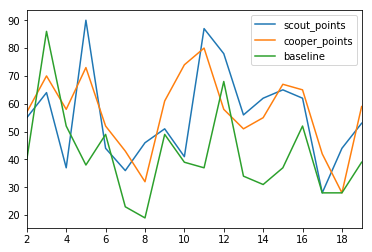

In [491]:
%matplotlib inline

team_points.loc[2:].plot()

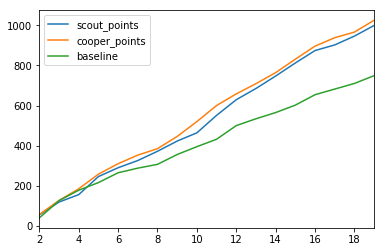

In [492]:
team_points.loc[2:].cumsum().plot()

In [493]:
team_points.loc[2:].sum()

scout_points      999.0
cooper_points    1025.0
baseline          749.0
dtype: float64

In [494]:
df.head()

,id_,web_name,team,element_type,assists,bonus,bps,clean_sheets,goals_scored,minutes,saves,total_points,transfers_in,transfers_out,total_points_1,total_points_2,total_points_3,total_points_4,total_points_5,total_points_6,total_points_7,total_points_8,total_points_9,total_points_10,total_points_11,total_points_12,total_points_13,total_points_14,total_points_15,total_points_16,total_points_17,total_points_18,total_points_19,total_points_20,total_points_21,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value_10,value_11,value_12,value_13,value_14,value_15,value_16,value_17,value_18,value_19,value_20,value_21
0,166,Vardy,9,4,5,25,529,7,17,1710,0,144,3696854,1037454,2.0,2.0,8.0,16.0,2.0,2.0,12.0,2.0,8.0,20.0,6.0,12.0,12.0,6.0,5.0,13.0,5.0,9.0,2.0,0,0,90.0,90.0,89.0,89.0,89.0,89.0,89.0,89.0,90.0,91.0,93.0,94.0,96.0,98.0,99.0,100.0,101.0,101.0,101.0,101,101
1,215,De Bruyne,11,3,14,19,567,8,7,1648,0,141,4422030,2146912,7.0,11.0,5.0,13.0,1.0,17.0,9.0,0.0,3.0,6.0,2.0,2.0,7.0,10.0,3.0,1.0,19.0,4.0,5.0,14,2,95.0,95.0,96.0,97.0,98.0,98.0,99.0,100.0,100.0,101.0,102.0,102.0,102.0,102.0,102.0,103.0,102.0,103.0,104.0,105,106
2,192,Mané,10,3,8,18,406,7,11,1583,0,140,3270824,1620004,1.0,13.0,3.0,8.0,15.0,2.0,3.0,12.0,2.0,5.0,12.0,7.0,9.0,2.0,15.0,0.0,6.0,0.0,6.0,11,8,115.0,115.0,115.0,115.0,115.0,116.0,116.0,116.0,118.0,118.0,119.0,120.0,121.0,122.0,122.0,123.0,123.0,0.0,122.0,122,123
3,11,Aubameyang,1,4,3,23,464,4,13,1877,0,123,1679687,2180219,6.0,6.0,5.0,9.0,13.0,5.0,9.0,2.0,2.0,2.0,8.0,2.0,5.0,13.0,2.0,12.0,2.0,2.0,7.0,9,2,110.0,110.0,110.0,110.0,110.0,110.0,110.0,110.0,111.0,111.0,111.0,110.0,110.0,109.0,109.0,109.0,108.0,108.0,108.0,108,108
4,233,Rashford,12,4,5,23,437,4,12,1818,0,122,2777464,2076223,13.0,6.0,0.0,2.0,9.0,2.0,4.0,2.0,9.0,9.0,2.0,5.0,11.0,5.0,13.0,9.0,2.0,2.0,6.0,9,2,85.0,86.0,87.0,86.0,85.0,85.0,84.0,84.0,84.0,84.0,85.0,85.0,86.0,87.0,87.0,88.0,90.0,91.0,91.0,91,91


In [495]:
histories.head()

,id_,web_name,value,assists,bonus,bps,clean_sheets,goals_scored,minutes,round,saves,selected,total_points,team_a_score,team_h_score,transfers_in,transfers_out,sum_points,sum_minutes,team_a_conceded_rank,points_per_90,next_week_points
0,166,Vardy,90,0,0,5,1,0,90,1,0,586801,2,0,0,0,0,2,90,1,2.0,2
1,166,Vardy,90,0,0,-3,0,0,90,2,0,551733,2,1,1,18334,100591,4,180,17,2.0,8
2,166,Vardy,89,0,2,25,0,1,90,3,0,488259,8,2,1,32101,110713,12,270,5,4.0,16
3,166,Vardy,89,1,3,63,0,2,90,4,0,499553,16,1,3,49194,56404,28,360,18,7.0,2
4,166,Vardy,89,0,0,5,0,0,90,5,0,613077,2,0,1,136063,52556,30,450,1,6.0,2


In [496]:
def linear_predict(gameweek, data):
    m = ols('next_week_points ~ goals_scored + assists + clean_sheets + saves + value + bps + selected + transfers_in + transfers_out + minutes + points_per_90',  data[data['round'] <= gameweek - 1]).fit()
    next_week = data[data['round'] == gameweek]
    predictions = m.predict(next_week)
    next_week['next_week_predictions'] = predictions   
    return next_week

In [497]:
team_points['linear_points'] = 0

In [498]:
for i in range(2, len(team_points.index) + 1):
    df_linear = linear_predict(i, histories)
    df_copy = df
    df_copy = df_copy.merge(df_linear[['id_', 'next_week_predictions']], how='left', on='id_')
    df_copy = df_copy.fillna(0)
    dream_team = team_select(df_copy.next_week_predictions, df_copy['value_' + str(i)], df_copy)
    captain = dream_team['next_week_predictions'].idxmax()
    next_week_points = dream_team['total_points_' + str(i+1)]
    team_points['linear_points'].loc[i] = sum(next_week_points) + dream_team['total_points_' + str(i+1)][captain]

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

In [499]:
team_points.head()

,scout_points,cooper_points,baseline,linear_points
0,88,83,0.0,0.0
1,65,57,37.0,0.0
2,55,57,40.0,47.0
3,64,70,86.0,91.0
4,37,58,52.0,49.0


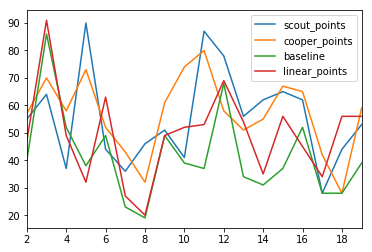

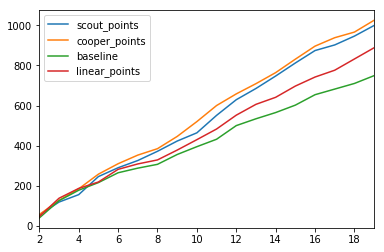

In [500]:
%matplotlib inline

team_points.loc[2:].plot()
team_points.loc[2:].cumsum().plot()

In [501]:
team_points.loc[2:].sum()

scout_points      999.0
cooper_points    1025.0
baseline          749.0
linear_points     888.0
dtype: float64

In [502]:
from sklearn.ensemble import RandomForestRegressor

In [503]:
team_points.head()

,scout_points,cooper_points,baseline,linear_points
0,88,83,0.0,0.0
1,65,57,37.0,0.0
2,55,57,40.0,47.0
3,64,70,86.0,91.0
4,37,58,52.0,49.0


In [504]:
histories.head()

,id_,web_name,value,assists,bonus,bps,clean_sheets,goals_scored,minutes,round,saves,selected,total_points,team_a_score,team_h_score,transfers_in,transfers_out,sum_points,sum_minutes,team_a_conceded_rank,points_per_90,next_week_points
0,166,Vardy,90,0,0,5,1,0,90,1,0,586801,2,0,0,0,0,2,90,1,2.0,2
1,166,Vardy,90,0,0,-3,0,0,90,2,0,551733,2,1,1,18334,100591,4,180,17,2.0,8
2,166,Vardy,89,0,2,25,0,1,90,3,0,488259,8,2,1,32101,110713,12,270,5,4.0,16
3,166,Vardy,89,1,3,63,0,2,90,4,0,499553,16,1,3,49194,56404,28,360,18,7.0,2
4,166,Vardy,89,0,0,5,0,0,90,5,0,613077,2,0,1,136063,52556,30,450,1,6.0,2


In [505]:
df_forest = histories[['id_', 'assists', 'bonus', 'bps', 'clean_sheets', 'goals_scored', 
                 'minutes', 'round', 'saves', 'selected', 'total_points',
                 'transfers_in',
                 'transfers_out', 'points_per_90', 'next_week_points']].sort_values('round')

In [506]:
df_forest.head()

,id_,assists,bonus,bps,clean_sheets,goals_scored,minutes,round,saves,selected,total_points,transfers_in,transfers_out,points_per_90,next_week_points
0,166,0,0,5,1,0,90,1,0,586801,2,0,0,2.000000,2
1295,147,0,0,5,1,0,68,1,0,104923,2,0,0,2.647059,2
7180,422,0,0,6,0,0,45,1,0,68985,1,0,0,2.000000,2
7159,136,0,0,5,1,0,90,1,0,8467,2,0,0,2.000000,2
1316,293,0,0,12,0,0,90,1,0,20821,2,0,0,2.000000,6


In [519]:
def forest_predict(gameweek):
    df_clean = df_forest.drop('id_', axis=1)
    df_clean = df_clean[df_clean['round'] <= gameweek - 1]
    X_train = df_clean.drop('next_week_points', axis=1)
    y_train = df_clean.next_week_points
    rfr = RandomForestRegressor(n_estimators=150, max_depth=5)
    rfr.fit(X_train, y_train)
    next_week = df_forest[df_forest['round'] == gameweek]
    X_test = next_week.drop(['id_', 'next_week_points'], axis=1)
    y_pred = rfr.predict(X_test)
    next_week['forest_predictions'] = y_pred
    return next_week
    
    
    

In [520]:
forest_predict(2).head()

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,id_,assists,bonus,bps,clean_sheets,goals_scored,minutes,round,saves,selected,total_points,transfers_in,transfers_out,points_per_90,next_week_points,forest_predictions
2882,349,0,0,12,0,0,90,2,0,166942,2,56870,20953,3.500000,2,2.484108
6747,44,0,0,4,0,0,73,2,0,204727,2,14182,27529,2.647059,1,2.228029
1506,70,0,0,0,0,0,0,2,0,24532,0,1136,5015,0.000000,0,0.324508
6726,238,0,0,4,0,0,90,2,0,635071,0,154468,36404,4.500000,2,3.035978
6705,489,0,0,-1,0,0,45,2,0,12029,1,3374,1801,2.347826,0,2.055509


In [521]:
team_points['forest_points'] = 0

In [522]:
for i in range(2, len(team_points.index) + 1):
    df_forest_predictions = forest_predict(i)
    df_copy = df
    df_copy = df_copy.merge(df_forest_predictions[['id_', 'forest_predictions']], how='left', on='id_')
    df_copy = df_copy.fillna(0)
    dream_team = team_select(df_copy.forest_predictions, df_copy['value_' + str(i)], df_copy)
    captain = dream_team['forest_predictions'].idxmax()
    next_week_points = dream_team['total_points_' + str(i+1)]
    team_points['forest_points'].loc[i] = sum(next_week_points) + dream_team['total_points_' + str(i+1)][captain]

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [523]:
team_points

,scout_points,cooper_points,baseline,linear_points,forest_points
0,88,83,0.0,0.0,0.0
1,65,57,37.0,0.0,0.0
2,55,57,40.0,47.0,16.0
3,64,70,86.0,91.0,49.0
4,37,58,52.0,49.0,56.0
5,90,73,38.0,32.0,47.0
6,44,52,49.0,63.0,47.0
7,36,43,23.0,27.0,32.0
8,46,32,19.0,20.0,29.0
9,51,61,49.0,49.0,36.0


scout_points      999.0
cooper_points    1025.0
baseline          749.0
linear_points     888.0
forest_points     848.0
dtype: float64

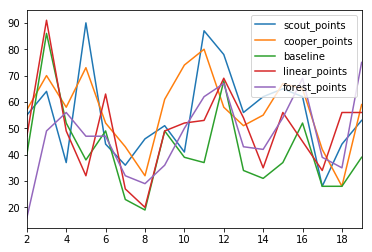

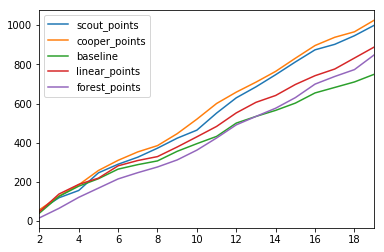

In [524]:
team_points.loc[2:].plot()
team_points.loc[2:].cumsum().plot()
team_points.loc[2:].sum()